# Understanding our Class Library
We'll be using the gwu_nn library to dive a bit deeper into how neural networks work and get a better handle on how we can manipulate our layers and activation functions to build better networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
#from gwu_nn.activation_layers import Sigmoid

## Setting up our Data
To explore how our GWU_Network library works we'll reuse the example data from the ML Crash Course. As the data is not linearly solvable, solving this problem will also show the flexibility of our network

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train[0].shape)
print(x_train[0])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

5

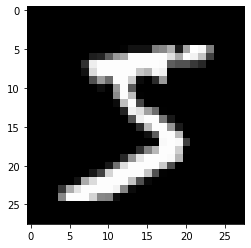

In [4]:
plt.imshow(x_train[0], cmap='gray')
y_train[0]

In [5]:
from tensorflow.keras.utils import to_categorical

# Reshaping the inputs
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
input_shape = x_train[0].shape
print(input_shape) # What is our input shape/shape of our image

# Turning the outputs into one-hot encoded representations
y_train_one = to_categorical(y_train)
y_test_one = to_categorical(y_test)
num_classes = y_test_one.shape[1]
print(num_classes) # How many classes are there?

(28, 28, 1)
10


In [6]:
from numpy import argmax

# This is our label to real world term dictionary
label_dict = {
 0: '0, zero',
 1: '1, one',
 2: '2, two',
 3: '3, three',
 4: '4, four',
 5: '5, five',
 6: '6, six',
 7: '7, seven',
 8: '8, eight',
 9: '9, nine'
}

# Depending on the format we may need argmax to interpret the results
print(label_dict[y_train[0]])
print(label_dict[argmax(y_train_one[0])])

5, five
5, five


In [7]:
print(x_train.shape)
#print(x_train[0])
x_train[0].shape

(60000, 28, 28, 1)


(28, 28, 1)

In [8]:
print(y_train_one.shape)
print(y_train_one[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
inp = np.zeros((3,4,5))
out = np.zeros((2,1))
#np.ndarray(shape=(2,2,3))

output = inp.shape
output[1:]

(4, 5)

## The GWUNetwork Class
This class is the main structure used to house our network. Like many standard libraries, our GWUNetwork or neural network model works by adding layers to it.

```python
class GWUNetwork():

    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    def add(self, layer):

    def get_weights(self):

    #def set_loss(self, loss):
       
    def predict(self, input_data):
       
    def measure_loss(self, x, y):

    def fit(self, x_train, y_train, epochs):
```

So when we create a network it is initially empty, as it doesn't contain any layers

In [10]:
from gwu_nn.gwu_network import GWUNetwork
from gwu_nn.layers import Dense, Convolutional

network = GWUNetwork()
print(network)

Model: Empty


## Adding Layers
To begin building our network we need to start adding functionality or layers. Each layer we add will increase the complexity and depth of our model. However, we'll find that for most simple problems 3-4 layers are typically enough.

Currently the GWU_NN library only supports densely connected layers, this means that every input node is connected to every output node.

In [11]:
network.add(Convolutional(num_kernels=5, kernel_size=3, activation='relu', input_size=x_train[0].shape))
network.add(Convolutional(num_kernels=2, kernel_size=3, activation='relu'))
print(network)

Model:
Convolutional - ((28, 28, 1), (5, 3, 3))
Convolutional - ((5, 3, 3), (2, 3, 3))



### Sigmoid Activation Layer/Function

Notice that the sigmoid layer/function works nearly identical to the Dense layer, just here:
 - activation -> forward propogation
 - activation_partial_derivative -> backward propogation
 
``` python
class SigmoidActivation(ActivationFunction):

    @classmethod
    def activation(cls, x):
        return 1 / (1 + np.exp(-x))

    @classmethod
    def activation_partial_derivative(cls, x):
        return np.exp(-x) / (1 + np.exp(-x))**2
```

## Compiling Our Model
Finally to complete our model we need to compile it. This final step defines our loss function, optimizer, learning_rate, and more (when working with larger libraries).

In [12]:
network.compile(loss='log_loss', lr=0.01)
print(network)

Model:
Convolutional - ((28, 28, 1), (5, 3, 3))
Convolutional - ((5, 3, 3), (2, 3, 3))



### Our Loss Function
We can see that our **log_loss** function parallels exactly what we had in our perceptron/logistic regression computational graph

```python
class LogLoss(LossFunction):

    @classmethod
    def loss(cls, y_true, y_pred):
        return np.mean(-np.log(y_pred)*y_true + -np.log(1-y_pred)*(1-y_true))

    @classmethod
    def loss_partial_derivative(cls, y_true, y_pred):
        return -np.sum(y_true - y_pred)
```

## Fitting or Training our Model
With everything put in place, the last step is to train our model
 - *batch_size (currently not supported): How many datapoints to train on for each backprop/gradient descent*
 - *epochs: How many times we loop over the data*

(1, 28, 28)


TypeError: Invalid shape (1, 28, 28) for image data

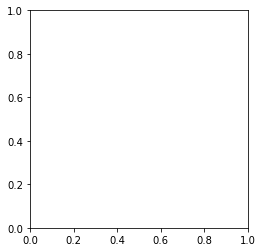

In [26]:
for img in x_train[1:5]:
    img = img.reshape(1,28,28)
    print(img.shape)
    plt.imshow(img, cmap='gray')

#x_train.shape
#x_train.reshape(-1,1,28,28)

In [13]:
network.fit(x_train, y_train, epochs=100, batch_size=1)

output shape:(1, 784)
(1, 784)


AssertionError: 

Here is a streamlined representation of our network

```python
network = GWUNetwork()
network.add(Dense(14, True, activation='relu', input_size=7))
network.add(Dense(1, True, activation='sigmoid'))
network.compile(loss='log_loss', lr=0.001)
network.fit(X_train, y_train, epochs=100, batch_size=20)
```

### Deeper Look at Training
```python
    def fit(self, x_train, y_train, batch_size, epochs):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j].reshape(1, -1)
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, self.learning_rate)

            # calculate average error on all samples
            if i % 10 == 0:
                err /= samples
                print('epoch %d/%d   error=%f' % (i + 1, epochs, err))
```

In [ ]:
network.predict(X_test[:2])

In [ ]:
network.layers[0].weights.shape

In [ ]:
network.layers[0].weights

In [ ]:
X_train[0].reshape(1, -1).dot(network.layers[0].weights)

In [ ]:
d_round = lambda x: 1 if x >= 0.5 else 0
predictions = [d_round(x[0][0]) for x in network.predict(X_test[:10])]
actual = [y for y in y_test[:10].reshape(-1)]

print(predictions)
print(actual)

## In Class:
Determine the accuracy and loss of the model using our holdout testing dataset

In [ ]:
# Joel's answer (I didn't copy it right)
thresh = lambda x: 0 if x < 0.5 else 1

test_size = y_test.shape[0]
correct = 0
for ix in range(test_size):
    pred = thresh(network.predict(X_test[ix].reshape(-1,7)[0]))
    if pred == y_test[1]:
        correct +=1

In [ ]:
# Space for work - this matched with Joel's answer
raw_predictions = network.predict(X_test)
predictions = [d_round(x[0][0]) for x in raw_predictions]
actual = [y for y in y_test.reshape(-1)]
count = 0
for p,a in zip(predictions,actual):
    if p == a:
        count += 1
print("accuracy: " + str(100 * count/len(predictions)))

In [ ]:
# My answer (def wrong)
mse = 0
for a,r in zip(actual,raw_predictions):
    mse += (a-r)**2
mse /= len(raw_predictions)
print("loss: " + str(mse[0][0]))

In [ ]:
# Joel's answer
preds = np.array(network.predict(X_test)).reshape(-1,1)
network.loss(y_test, preds)

## In Class:
Use the GWU Network to solve one of our earlier problems

In [ ]:
# Space for work